# Лабораторная работа №4

## Условие

Вариант №7

Распределения:

$$\mathbf{X} \sim N(-1, 2)$$
$$\mathbf{Y} \sim R(-2, 0)$$

Объём выборки:

$$ n = 100 $$

## Импорты

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from time import time
from IPython.display import display, Markdown  # для вывода формул в консоль
import pandas as pd

## Определения

In [2]:
m1, std1 = -1, 2
a2, b2 = -2, 0
n = 100

In [3]:
def mprint(*strings):
    for s in strings:
        display(Markdown(s))


np.random.seed(int(time()))
plt.rc("text", usetex=True)
plt.rc(
    "text.latex",
    preamble=r"""
\usepackage[english, russian]{babel}
\usepackage[utf8]{inputenc}
""",
)
plt.style.use("seaborn-v0_8")

In [4]:
def dataframe_to_markdown(df):
    markdown_table = "| Index | " + " | ".join(df.columns) + " |\n"
    markdown_table += "|---" * (len(df.columns) + 1) + "|\n"  # Учитываем индекс

    for index, row in df.iterrows():
        row_values = [str(round(val, 2) if type(val) != str else val) for val in row]
        markdown_table += f"| {index} | " + " | ".join(row_values) + " |\n"

    return markdown_table

In [5]:
alpha = 0.05


def verdict(alpha, p_value):
    if alpha > p_value:
        return "$H_0$ отклоняется"
    else:
        return "$H_0$ принимается"

## 1. Исходные данные

In [7]:
X = np.random.normal(m1, std1, n)
Y = np.random.uniform(a2, b2, n)

mprint(f"$X$: {X[:10].round(2)}")
mprint(f"$Y$: {Y[:10].round(2)}")

$X$: [-0.29  0.63 -1.49  3.46 -1.49 -1.06 -0.68  0.04 -3.68 -3.66]

$Y$: [-1.15 -0.67 -1.4  -1.15 -1.36 -0.48 -1.25 -1.86 -1.95 -1.17]

### Характеристики наблюдаемых случайных величин

| СВ             | Распределение | Параметры                | Математическое ожидание, $m_i$    | Дисперсия, $\sigma_i^2$                                 | Объём выборки, $n_i$ |
| -------------- | ------------- | ------------------------ | --------------------------------- | ------------------------------------------------------- | -------------------- |
| $X$ | $N(-1, 2)$    | $m_1 = -1, \sigma_1 = 2$ | $m_1 = -1$                        | $\sigma_1^2 = 4$                                        | 100                  |
| $Y$ | $R(-2, 0)$    | $a_2 = -2, b_2 = 0$      | $m_2 = \dfrac{a_2 + b_2}{2} = -1$ | $\sigma_2^2 = \dfrac{(b_2 - a_2)^2}{12} = \dfrac{1}{3}$ | 100                  |

### Выборочные характеристики

In [8]:
mean_X = X.mean()
S_X = X.var(ddof=1)

mean_Y = Y.mean()
S_Y = Y.var(ddof=1)

r_XY = stats.pearsonr(X, Y)[0]
rho_XY = stats.spearmanr(X, Y)[0]
tau_XY = stats.kendalltau(X, Y)[0]

mprint(f"$\\overline{{x}} =$ {mean_X:.2f}, $s_X^2 =$ {S_X:.2f}")
mprint(f"$\\overline{{y}} =$ {mean_Y:.2f}, $s_Y^2 =$ {S_Y:.2f}")

mprint(
    f"$r_{{XY}} =$ {r_XY:.2f}, $\\rho_{{XY}} =$ {rho_XY:.2f}, $\\tau_{{XY}} =$ {tau_XY:.2f}"
)

$\overline{x} =$ -1.15, $s_X^2 =$ 3.54

$\overline{y} =$ -0.97, $s_Y^2 =$ 0.32

$r_{XY} =$ 0.03, $\rho_{XY} =$ 0.00, $\tau_{XY} =$ 0.01

| СВ  | Среднее, $\overline{x_i}$ | Оценка дисперсии, $s_i^2$ | КК по Пирсону, $r_{XY}$ | КК по Спирмену, $\rho_{XY}$ | КК по Кендаллу, $\tau_{XY}$ |
| --- | ------------------------- | ------------------------- | ----------------------- | --------------------------- | --------------------------- |
| X   | -1.15                     | 3.54                      | 0.03                    | 0.00                        | 0.01                        |
| Y   | -0.97                     | 0.32                      | 0.03                    | 0.00                        | 0.01                        |

### Проверка значимости коэффициентов корреляции

In [ ]:
z_r_XY = r_XY * sqrt(n - 2) / sqrt(1 - r_XY**2)
p_r_XY = stats.pearsonr(X, Y)[1]

z_rho_XY = rho_XY * sqrt(n - 2) / sqrt(1 - rho_XY**2)
p_rho_XY = stats.spearmanr(X, Y)[1]

z_tau_XY = tau_XY * sqrt(9 * n * (n + 1)) / sqrt(2 * (2 * n + 5))
p_tau_XY = stats.kendalltau(X, Y)[1]

mprint(
    r"### Проверка значимости КК",
    r"---",
    r"### $r_{XY}$",
    f"$H_0$: $r_{{XY}} = 0$, $H_1$: $r_{{XY}} \\neq 0$",
    f"$z_{{выб}} =$ {z_r_XY:.2f}, ",
    f"$p =$ {p_r_XY:.2f}",
    verdict(alpha, p_r_XY),
    r"---",
    r"### $\rho_{XY}$",
    f"$H_0$: $\\rho_{{XY}} = 0$, $H_1$: $\\rho_{{XY}} \\neq 0$",
    f"$z_{{выб}} =$ {z_rho_XY:.2f}, ",
    f"$p =$ {p_rho_XY:.2f}",
    verdict(alpha, p_rho_XY),
    r"---",
    r"### $\tau_{XY}$",
    f"$H_0$: $\\tau_{{XY}} = 0$, $H_1$: $\\tau_{{XY}} \\neq 0$",
    f"$z_{{выб}} =$ {z_tau_XY:.2f}, ",
    f"$p =$ {p_tau_XY:.2f}",
    verdict(alpha, p_tau_XY),
)

### Проверка значимости КК

---

### $r_{XY}$

$H_0$: $r_{XY} = 0$, $H_1$: $r_{XY} \neq 0$

$z_{выб} =$ 0.34, 

$p =$ 0.73

$H_0$ принимается

---

### $\rho_{XY}$

$H_0$: $ho_{XY} = 0$, $H_1$: $ho_{XY} \neq 0$

$z_{выб} =$ 0.04, 

$p =$ 0.97

$H_0$ принимается

---

### $\tau_{XY}$

$H_0$: $	au_{XY} = 0$, $H_1$: $	au_{XY} \neq 0$

$z_{выб} =$ 0.08, 

$p =$ 0.94

$H_0$ принимается

| Статистическая гипотеза, $H_0$                 | $p$-value | Статистическое решение при $\alpha = 0.05$ | Ошибка статистического решения |
| ---------------------------------------------- | --------- | ------------------------------------------ | ------------------------------ |
| $H_0:\ r_{XY} = 0 \\H_1:\ r_{XY} \neq 0$       | 0.73      | $H_0$ принимается                          | Нет                            |
| $H_0:\ \rho_{XY} = 0 \\H_1:\ \rho_{XY} \neq 0$ | 0.97      | $H_0$ принимается                          | Нет                            |
| $H_0:\ \tau_{XY} = 0 \\H_1:\ \tau_{XY} \neq 0$ | 0.94      | $H_0$ принимается                          | Нет                            |


## 2. Визуальное представление двумерной выборки

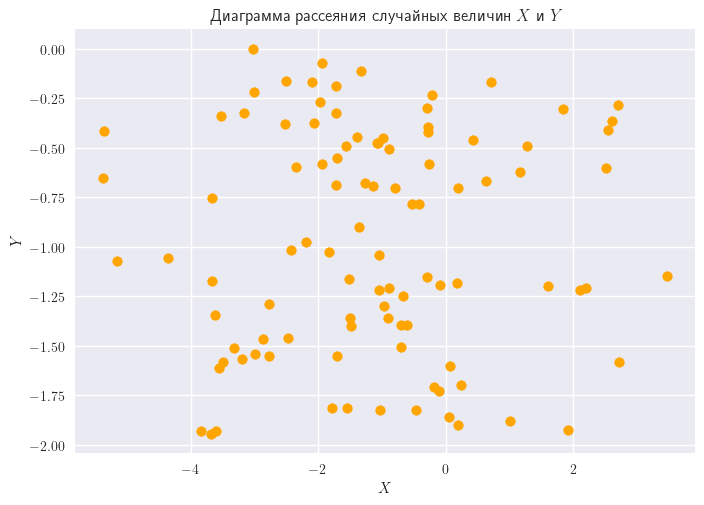

In [10]:
plt.scatter(X, Y, color="orange")
plt.xlabel(r"$X$")
plt.ylabel(r"$Y$")
plt.title(r"Диаграмма рассеяния случайных величин $X$ и $Y$")
plt.show()

## 3. Проверка независимости методом таблиц сопряженности

Статистическая гипотеза: $H_0:\ F_y(y \mid X \in \Delta_1) = F_y(y \mid X \in \Delta_2) = \ldots = F_y(y \mid X \in \Delta_k) = F_y(y);\ \ \ H':\ \exists i, j: F_Y(y \mid X \in \Delta_i) \neq F_Y(y \mid X \in \Delta_j)$

### Эмпирическая таблица сопряженности

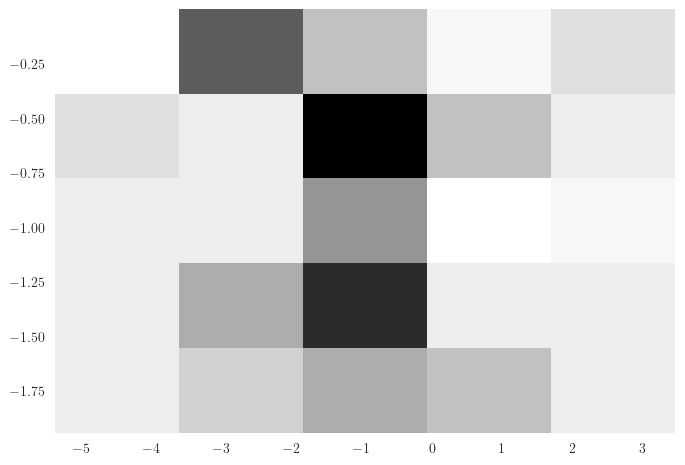

In [17]:
k = 5

emperical_table, bin_edges_X, bin_edges_Y, _ = plt.hist2d(X, Y, bins=k)

In [18]:
columns = [f"[{bin_edges_Y[i]:.2f}, {bin_edges_Y[i+1]:.2f})" for i in range(k - 1)] + [
    f"[{bin_edges_Y[-2]:.2f}, {bin_edges_Y[-1]:.2f}]"
]
indexes = [
    f"$\\Delta_{{{i+1}}} =$ [{bin_edges_X[i]:.2f}, {bin_edges_X[i+1]:.2f})"
    for i in range(k - 1)
] + [f"$\\Delta_{{{k}}} =$ [{bin_edges_X[-2]:.2f}, {bin_edges_X[-1]:.2f}]"]

emperical_table = pd.DataFrame(emperical_table, columns=columns, index=indexes)
emperical_table

,"[-1.95, -1.56)","[-1.56, -1.17)","[-1.17, -0.78)","[-0.78, -0.39)","[-0.39, -0.00]"
"$\Delta_{1} =$ [-5.37, -3.61)",2.0,2.0,2.0,3.0,0.0
"$\Delta_{2} =$ [-3.61, -1.84)",4.0,6.0,2.0,2.0,10.0
"$\Delta_{3} =$ [-1.84, -0.07)",6.0,12.0,7.0,14.0,5.0
"$\Delta_{4} =$ [-0.07, 1.69)",5.0,2.0,0.0,5.0,1.0
"$\Delta_{5} =$ [1.69, 3.46]",2.0,2.0,1.0,2.0,3.0


In [19]:
print(dataframe_to_markdown(emperical_table))

| Index | [-1.95, -1.56) | [-1.56, -1.17) | [-1.17, -0.78) | [-0.78, -0.39) | [-0.39, -0.00] |
|---|---|---|---|---|---|
| $\Delta_{1} =$ [-5.37, -3.61) | 2.0 | 2.0 | 2.0 | 3.0 | 0.0 |
| $\Delta_{2} =$ [-3.61, -1.84) | 4.0 | 6.0 | 2.0 | 2.0 | 10.0 |
| $\Delta_{3} =$ [-1.84, -0.07) | 6.0 | 12.0 | 7.0 | 14.0 | 5.0 |
| $\Delta_{4} =$ [-0.07, 1.69) | 5.0 | 2.0 | 0.0 | 5.0 | 1.0 |
| $\Delta_{5} =$ [1.69, 3.46] | 2.0 | 2.0 | 1.0 | 2.0 | 3.0 |



| X\Y                           | [-1.95, -1.56) | [-1.56, -1.17) | [-1.17, -0.78) | [-0.78, -0.39) | [-0.39, -0.00] |
| ----------------------------- | -------------- | -------------- | -------------- | -------------- | -------------- |
| $\Delta_{1} =$ [-5.37, -3.61) | 2.0            | 2.0            | 2.0            | 3.0            | 0.0            |
| $\Delta_{2} =$ [-3.61, -1.84) | 4.0            | 6.0            | 2.0            | 2.0            | 10.0           |
| $\Delta_{3} =$ [-1.84, -0.07) | 6.0            | 12.0           | 7.0            | 14.0           | 5.0            |
| $\Delta_{4} =$ [-0.07, 1.69)  | 5.0            | 2.0            | 0.0            | 5.0            | 1.0            |
| $\Delta_{5} =$ [1.69, 3.46]   | 2.0            | 2.0            | 1.0            | 2.0            | 3.0            |

### Теоретическая таблица сопряженности

In [20]:
V1 = emperical_table.sum(axis=1).values
V1 = np.atleast_2d(V1).T
V1

array([[ 9.],
       [24.],
       [44.],
       [13.],
       [10.]])

In [21]:
V2 = emperical_table.sum(axis=0).values
V2 = np.atleast_2d(V2)
V2

array([[19., 24., 12., 26., 19.]])

In [22]:
theoretical_table = pd.DataFrame(np.dot(V1, V2) / n, columns=columns, index=indexes)
theoretical_table

,"[-1.95, -1.56)","[-1.56, -1.17)","[-1.17, -0.78)","[-0.78, -0.39)","[-0.39, -0.00]"
"$\Delta_{1} =$ [-5.37, -3.61)",1.71,2.16,1.08,2.34,1.71
"$\Delta_{2} =$ [-3.61, -1.84)",4.56,5.76,2.88,6.24,4.56
"$\Delta_{3} =$ [-1.84, -0.07)",8.36,10.56,5.28,11.44,8.36
"$\Delta_{4} =$ [-0.07, 1.69)",2.47,3.12,1.56,3.38,2.47
"$\Delta_{5} =$ [1.69, 3.46]",1.90,2.40,1.20,2.60,1.90


In [23]:
print(dataframe_to_markdown(theoretical_table))

| Index | [-1.95, -1.56) | [-1.56, -1.17) | [-1.17, -0.78) | [-0.78, -0.39) | [-0.39, -0.00] |
|---|---|---|---|---|---|
| $\Delta_{1} =$ [-5.37, -3.61) | 1.71 | 2.16 | 1.08 | 2.34 | 1.71 |
| $\Delta_{2} =$ [-3.61, -1.84) | 4.56 | 5.76 | 2.88 | 6.24 | 4.56 |
| $\Delta_{3} =$ [-1.84, -0.07) | 8.36 | 10.56 | 5.28 | 11.44 | 8.36 |
| $\Delta_{4} =$ [-0.07, 1.69) | 2.47 | 3.12 | 1.56 | 3.38 | 2.47 |
| $\Delta_{5} =$ [1.69, 3.46] | 1.9 | 2.4 | 1.2 | 2.6 | 1.9 |



| Index                         | [-1.95, -1.56) | [-1.56, -1.17) | [-1.17, -0.78) | [-0.78, -0.39) | [-0.39, -0.00] |
| ----------------------------- | -------------- | -------------- | -------------- | -------------- | -------------- |
| $\Delta_{1} =$ [-5.37, -3.61) | 1.71           | 2.16           | 1.08           | 2.34           | 1.71           |
| $\Delta_{2} =$ [-3.61, -1.84) | 4.56           | 5.76           | 2.88           | 6.24           | 4.56           |
| $\Delta_{3} =$ [-1.84, -0.07) | 8.36           | 10.56          | 5.28           | 11.44          | 8.36           |
| $\Delta_{4} =$ [-0.07, 1.69)  | 2.47           | 3.12           | 1.56           | 3.38           | 2.47           |
| $\Delta_{5} =$ [1.69, 3.46]   | 1.9            | 2.4            | 1.2            | 2.6            | 1.9            |

### Проверка статистической гипотезы

In [24]:
res = stats.chi2_contingency(emperical_table)
z = res.statistic
p = res.pvalue

mprint(
    r"### $\chi^2$-test",
    r"$H_0:\ F_y(y \mid X \in \Delta_1) = F_y(y \mid X \in \Delta_2) = \ldots = F_y(y \mid X \in \Delta_k) = F_y(y)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p:.2f}",
    verdict(alpha, p),
)

### $\chi^2$-test

$H_0:\ F_y(y \mid X \in \Delta_1) = F_y(y \mid X \in \Delta_2) = \ldots = F_y(y \mid X \in \Delta_k) = F_y(y)$

$z_{выб} =$ 22.89

$p =$ 0.12

$H_0$ принимается

| Выборочное значение статистики критерия | $p$-value | Статистическое решение при $\alpha = 0.05$ | Ошибка статистического решения |
| --------------------------------------- | --------- | ------------------------------------------ | ------------------------------ |
| 22.89                                   | 0.12      | $H_0$ принимается                          | Нет                            |


## 4. Исследование корреляционной связи

Случайная величина $U = \lambda X + (1 - \lambda)Y,\ \lambda \in [0;1]$

Случайная величина $V = \lambda X^3 + (1 - \lambda)Y^3,\ \lambda \in [0;1]$

In [25]:
lambdas = np.linspace(0, 1, 10000)

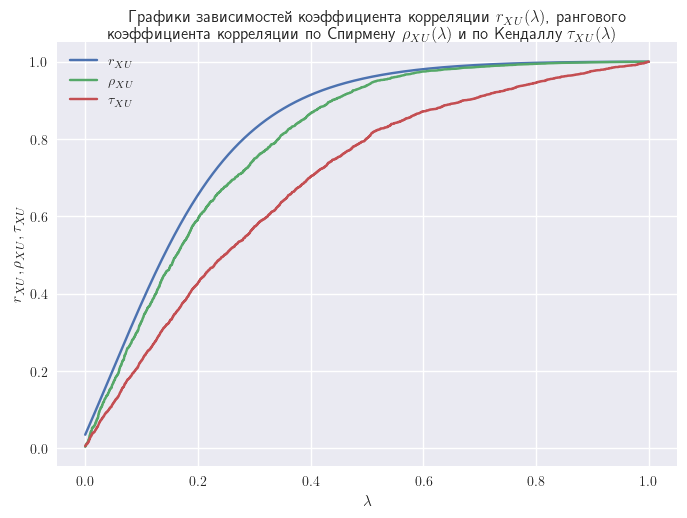

In [26]:
r_XU = []
rho_XU = []
tau_XU = []

for l in lambdas:
    U = l * X + (1 - l) * Y
    r_XU += [stats.pearsonr(X, U)[0]]
    rho_XU += [stats.spearmanr(X, U)[0]]
    tau_XU += [stats.kendalltau(X, U)[0]]

plt.plot(lambdas, r_XU, label=r"$r_{XU}$")
plt.plot(lambdas, rho_XU, label=r"$\rho_{XU}$")
plt.plot(lambdas, tau_XU, label=r"$\tau_{XU}$")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$r_{XU}, \rho_{XU}, \tau_{XU}$")
plt.title(
    r"Графики зависимостей коэффициента корреляции $r_{XU}(\lambda)$, рангового\\ коэффициента корреляции по Спирмену $\rho_{XU}(\lambda)$ и по Кендаллу $\tau_{XU}(\lambda)$"
)
plt.legend()
plt.show()

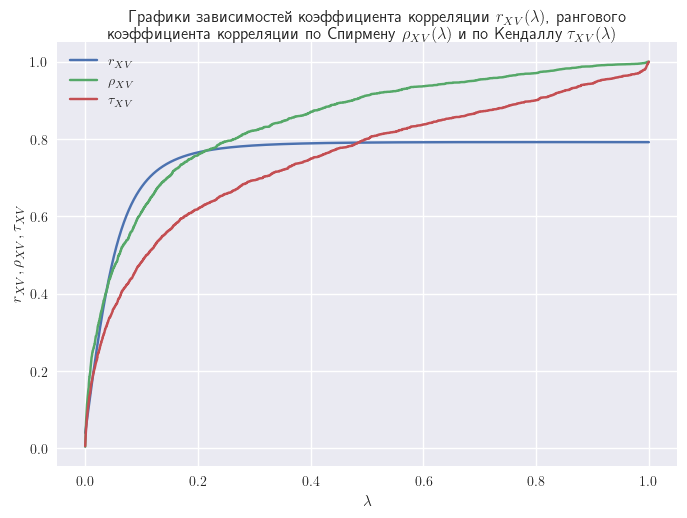

In [27]:
r_XV = []
rho_XV = []
tau_XV = []

for l in lambdas:
    V = l * X**3 + (1 - l) * Y**3
    r_XV += [stats.pearsonr(X, V)[0]]
    rho_XV += [stats.spearmanr(X, V)[0]]
    tau_XV += [stats.kendalltau(X, V)[0]]

plt.plot(lambdas, r_XV, label=r"$r_{XV}$")
plt.plot(lambdas, rho_XV, label=r"$\rho_{XV}$")
plt.plot(lambdas, tau_XV, label=r"$\tau_{XV}$")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$r_{XV}, \rho_{XV}, \tau_{XV}$")
plt.title(
    r"Графики зависимостей коэффициента корреляции $r_{XV}(\lambda)$, рангового\\ коэффициента корреляции по Спирмену $\rho_{XV}(\lambda)$ и по Кендаллу $\tau_{XV}(\lambda)$"
)
plt.legend()
plt.show()

Выводы:

По первому графику: при $\lambda \to 0$ все коэффициенты корреляции стремятся к 0, что свидетельствует об отсутствии линейной корреляционной связи между случайными величинами $X$ и $U$. При $\lambda \to 1$ все коэффициенты корреляции стремятся к 1, что свидетельствует о наличии линейной функциональной зависимости между случайными величинами $X$ и $U$.

По второму графику: $r_{XV}$ никогда не принимает значений 1, что свидетельствует об отсутствии линейной функциональной зависимости между случайными величинами $X$ и $V$. Однако при $\lambda \to 1$ коэффициенты корреляции $\rho_{XV}, \tau_{XV} \to 1$, что свидетельствует о наличии монотонной функциональной зависимости между случайными величинами $X$ и $V$. При $\lambda \to 0$ коэффициенты корреляции $r_{XV}, \rho_{XV}, \tau_{XV}$ близки к 0, что свидетельствует об отсутствии линейной и даже монотонной корреляционной связи между случайными величинами $X$ и $V$. 

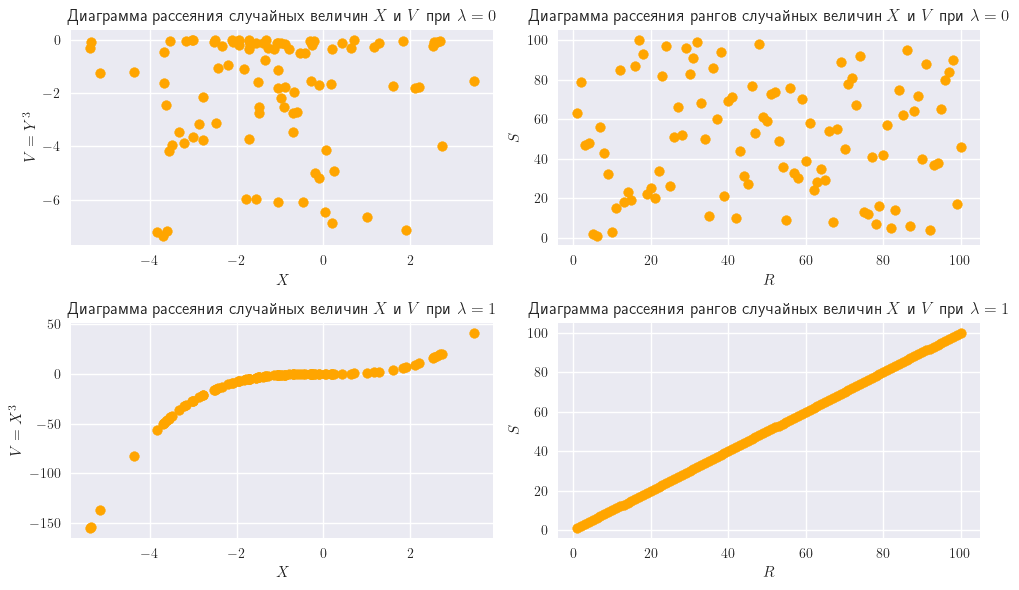

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

axes[0, 0].scatter(X, Y**3, color="orange")
axes[0, 0].set_xlabel(r"$X$")
axes[0, 0].set_ylabel(r"$V = Y^3$")
axes[0, 0].set_title(
    r"Диаграмма рассеяния случайных величин $X$ и $V$ при $\lambda = 0$"
)

axes[0, 1].scatter(stats.rankdata(X), stats.rankdata(Y**3), color="orange")
axes[0, 1].set_xlabel(r"$R$")
axes[0, 1].set_ylabel(r"$S$")
axes[0, 1].set_title(
    r"Диаграмма рассеяния рангов случайных величин $X$ и $V$ при $\lambda = 0$"
)

axes[1, 0].scatter(X, X**3, color="orange")
axes[1, 0].set_xlabel(r"$X$")
axes[1, 0].set_ylabel(r"$V = X^3$")
axes[1, 0].set_title(
    r"Диаграмма рассеяния случайных величин $X$ и $V$ при $\lambda = 1$"
)

axes[1, 1].scatter(stats.rankdata(X), stats.rankdata(X**3), color="orange")
axes[1, 1].set_xlabel(r"$R$")
axes[1, 1].set_ylabel(r"$S$")
axes[1, 1].set_title(
    r"Диаграмма рассеяния рангов случайных величин $X$ и $V$ при $\lambda = 1$"
)

plt.tight_layout()
plt.show()

Выводы:

Если $X$ и $V$ независимы, то и их ранги $R$ и $S$ также будут независимыми. 

Если $V = \varphi(X)$, $\varphi$ - монотонная функция, то переход к рангам "выпрямляет" монотонную зависимость исходных признаков.